<a href="https://colab.research.google.com/github/mrmendapara/Python-ML/blob/master/California_Housing_Price_Multivariate_Linear_Regression_Trial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [0]:
data = pd.read_csv("sample_data/california_housing_test.csv")

In [0]:
data =data.dropna(axis=0)

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0


In [0]:
target_var = data['median_house_value']
feature = data.drop(['median_house_value'], axis=1).copy()

In [0]:
feature = feature/feature.max()
target_var = target_var/target_var.max()

In [15]:
target_var = np.array(target_var)
target_var = np.reshape(target_var, [1,len(target_var)])
print(target_var.shape)

(1, 3000)


In [0]:
feature = np.array(feature)

In [0]:
print("Feature Shape : ", feature.shape)
print("Target Variable shape : ", target_var.shape)

In [0]:
def line_multidim(m,x,c):
  return np.dot(m,x.T) + c

def error(m,x,c,y):
  return np.mean((line_multidim(m,x,c) - y)**2)

def derivative_slopes(m,x,c,y):
  return 2*np.mean(np.multiply((line_multidim(m,x,c)-y),x.T),axis = 1)

def derivative_intercept(m,x,c,y):
  return 2*np.mean((line_multidim(m,x,c)-y))

def accuracy_pred(error,y):
  return 100 - (error/np.mean(y**2))*100

Current Error:  0.032909041393716185 Current Iteration: 1999
Current Accuracy: 85.08588828673594


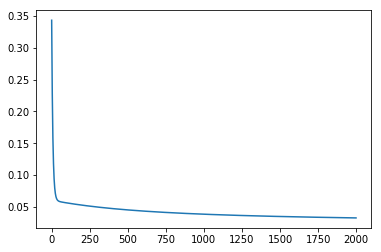

In [19]:
m = np.random.randn(1,8)
c = random.random()

iterations = 2000
lr = 0.01
error_array = []

for i in range(0,iterations):
  m = m - lr*derivative_slopes(m,feature,c,target_var)
  c = c - lr*derivative_intercept(m,feature,c,target_var)
  error_array.append(error(m,feature,c,target_var))
  clear_output(True)
  print("Current Error: ",error(m,feature,c,target_var),"Current Iteration:",i)
  print("Current Accuracy:",accuracy_pred(error(m,feature,c,target_var),target_var))
  
plt.plot(error_array)
plt.show()